<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/correlogram_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Annotated correlogram #

This is a demo involving adapted code (heatmapz) that creates an annotated correlogram.

References:
[Notebook](https://colab.research.google.com/drive/1YSvER-U3cwGplSHyXwaCXYhOWfWO53Iy#scrollTo=1_yicqzYzUL3), [source](https://pypi.org/project/heatmapz/)


In [11]:
import pandas as pd

use_own = 0

if use_own:
  
  from scipy.stats import spearmanr, pearsonr

  matrix # build your M X H correlation matrix here
  for m in range(N):
    for n in range(M):        
        if m!=n and matrix[m,n]==0:             
            a=NormalizedData[m,]
            b=NormalizedData[n,]

            q=np.where(np.isnan(a)==False)[0]    
            q2=np.where(np.isnan(b)==False)[0]    
            q=np.intersect1d(q,q2)                
            
            nsamples=len(q)            
            r, p_value = spearmanr( a[q], b[q])                
            matrix[m, n] = r*(p_value<.05)      # report only "stat. sign" correlations AND not storing data symmetrically for purpose of correlogram
else:  
  # test data
  data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

  cdf = data.corr()
  print(cdf.head())

                    symboling  normalized-losses  ...  highway-mpg     price
 symboling           1.000000           0.466264  ...     0.036233 -0.082391
normalized-losses    0.466264           1.000000  ...    -0.181877  0.133999
wheel-base          -0.535987          -0.056661  ...    -0.543304  0.584642
length              -0.365404           0.019424  ...    -0.698142  0.690628
width               -0.242423           0.086802  ...    -0.680635  0.751265

[5 rows x 16 columns]


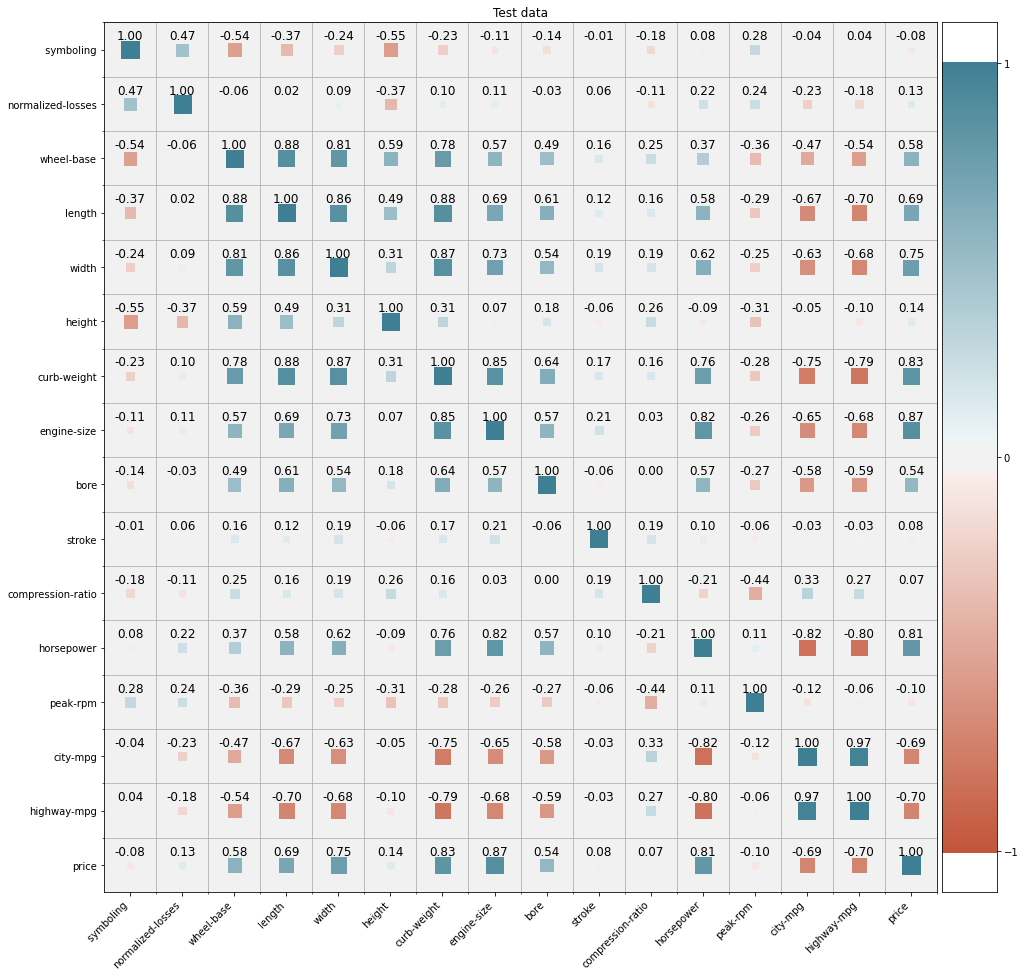

In [14]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
 

def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'title', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order', 'xlabel', 'ylabel'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )            
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    ax.set_xlabel(kwargs.get('xlabel', ''))
    ax.set_ylabel(kwargs.get('ylabel', ''))
    ax.set_title(kwargs.get('title', ''))
    
    xx=[t + 0.5 for t in ax.get_xticks()] 
    a=np.diff(xx)    
    px=[x_to_num[v] for v in x]
    py=[y_to_num[v] for v in y]      
    
    for i,x in enumerate(px):               
        if np.abs(color[i] )>0:
            text = ax.text(x, py[i]+a[0]/4,'%.2f'% color[i],
               ha="center", va="center", fontsize=12, color="k")    

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right         

def corrplot(data, size_scale=500, marker='s', title=None):
    corr = pd.melt(data.reset_index(), id_vars='index').replace(np.nan, 0)
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale, title=title
    )        

W=H=16
def plot_corr_per_subject_all( matrix, title=None ):        
    fig,axes=plt.subplots(1,1, figsize=(  W,H ));            
    corrplot( matrix, size_scale=300, title=title )    
    return 

if use_own:
  cdf = pd.DataFrame( matrix, columns=list( variable_names ),  ) 
  cdf.index = variable_names
  a_title='Spearman''s correlations deemed statistically significant'

plot_corr_per_subject_all( cdf, title='Test data'  )
